In [1]:
#Подгружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [69]:
#Подгружаем данные
netflix_data = pd.read_csv('netflixData.csv')
netflix_data.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [70]:
#Информация 
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [71]:
#Пропущенные данные 
netflix_data.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

In [72]:
#Уберем три значения NaN в колонке Release Date, чтоб иметь возможность изменить тип данных
netflix_data.dropna(subset=['Release Date'], inplace=True)

In [73]:
#Проверим количество данных
netflix_data.shape

(5964, 13)

In [74]:
netflix_data['Release Date'].unique()

array([2020., 2019., 2018., 2017., 2016., 2014., 2012., 2013., 2009.,
       2011., 2015., 2021., 1971., 2006., 2007., 1988., 2008., 1993.,
       2010., 1986., 1990., 1997., 1979., 1989., 1980., 2002., 1992.,
       2001., 1966., 1982., 1994., 2005., 2003., 1999., 1978., 2000.,
       1975., 1991., 2004., 1998., 1981., 1958., 1996., 1976., 1983.,
       1974., 1995., 1956., 1985., 1984., 1987., 1945., 1972., 1977.,
       1973., 1964., 1925., 1969., 1962., 1963., 1960., 1968., 1954.,
       1970., 1959.])

In [75]:
#Поменяем тип данных в колонке "Дата релиза"
netflix_data['Release Date'] = netflix_data['Release Date'].astype(int)

In [76]:
#Замена NaN 
#Проверим процент пропущенных данных с помощью цикла for
for i in netflix_data.columns:
    null_rate = netflix_data[i].isna().sum() / len(netflix_data) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

Director null rate: 34.61%
Cast null rate: 8.89%
Production Country null rate: 9.37%
Rating null rate: 0.02%
Imdb Score null rate: 10.14%
Date Added null rate: 22.33%


In [78]:
#Замена NaN на моду
netflix_data['Production Country'] = netflix_data['Production Country'].fillna(netflix_data['Production Country'].mode()[0])
netflix_data['Imdb Score'] = netflix_data['Imdb Score'].fillna(netflix_data['Imdb Score'].mode()[0])

In [79]:
#Удолим столбцы, в которых слишком много пропущенных данных и которые не планируем анализировать.
netflix_data.drop(['Director', 'Date Added'], axis=1, inplace=True)

In [65]:
netflix_data.head(2)

,Show Id,Title,Description,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,Reality TV,NaN,United States,2020,TV-MA,1 Season,6.6/10,TV Show
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...","Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020,TV-MA,99 min,6.2/10,Movie


In [90]:
netflix_data.shape

(5963, 11)

In [88]:
netflix_data.isnull().sum()

Show Id               0
Title                 0
Description           0
Genres                0
Cast                  0
Production Country    0
Release Date          0
Rating                0
Duration              0
Imdb Score            0
Content Type          0
dtype: int64

In [83]:
#Заменим NaN в колонке 'Cast' на строку 'No Data'
netflix_data['Cast'].replace(np.nan, 'No Data',inplace  = True)

In [87]:
# Удаляем 
netflix_data.dropna(subset=['Rating'], inplace=True)

# Удаляем дубликаты

netflix_data.drop_duplicates(inplace= True)

In [89]:
netflix_data.head()

,Show Id,Title,Description,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,Reality TV,No Data,United States,2020,TV-MA,1 Season,6.6/10,TV Show
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...","Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020,TV-MA,99 min,6.2/10,Movie
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019,TV-14,95 min,6.4/10,Movie
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020,TV-MA,1 Season,6.6/10,TV Show
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,"Documentaries, International Movies",No Data,Canada,2020,TV-14,90 min,5.1/10,Movie


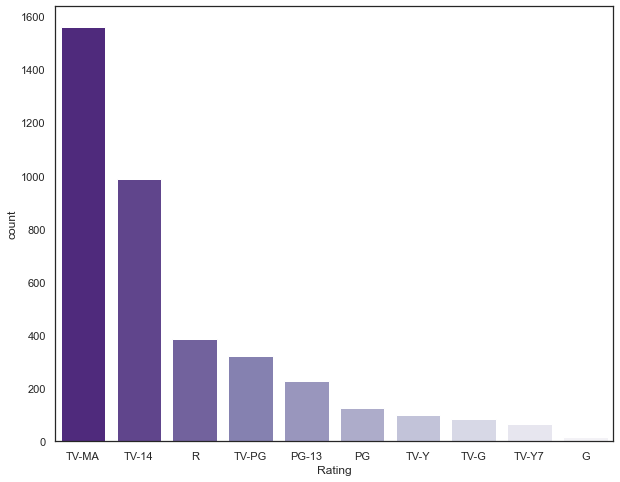

In [130]:
# Анализ
#Проанализируем рейтинги фильмов

plt.figure(figsize=(10,8))
sns.set(style="white")

# Сделаем переход от самого темного фиолетового к самому светлому
ax = sns.countplot(x="Rating", data=netflix_movies, palette="Purples_r", order=netflix_movies['Rating'].value_counts().index[0:10])

In [92]:

#Проанализируем соотношение разных типов контента на платформе 
#Разделим сериалы и фильмы

netflix_shows = netflix_data[netflix_data['Content Type']=='TV Show']
netflix_movies = netflix_data[netflix_data['Content Type']=='Movie']

In [98]:
#Соотношение фильмов и телепередач

a=netflix_data.groupby(['Content Type'])['Content Type'].count()
b=len(netflix_data)
r=((a/b)).round(2)

mf_ratio = pd.DataFrame(r).T
mf_ratio

Content Type,Movie,TV Show
Content Type,0.65,0.35


<AxesSubplot:title={'center':'Content Type on Netflix'}, ylabel='Content Type'>

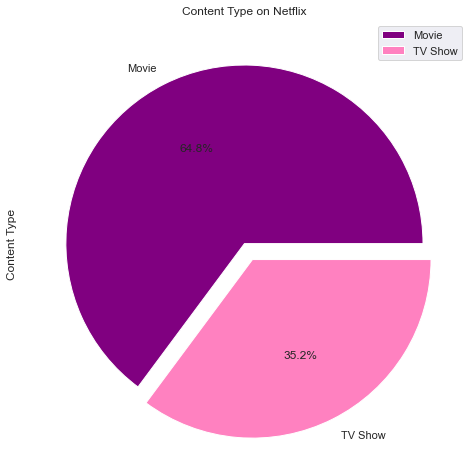

In [114]:
#Для наглядности, построим круговую диаграмму

contentType_count = netflix_data['Content Type'].value_counts()
contentType_count.plot(kind='pie', autopct='%1.1f%%', legend=True, explode=(0, 0.1), 
                        title = "Content Type on Netflix", colors=["#800080", "#FF81C0"],
                        figsize=(8,16))

Диаграмма наглядно показывает, что количество фильмов превышает количество ТВ-шоу на платформе 

Text(0, 0.5, 'Count of Movie/ TV Show')

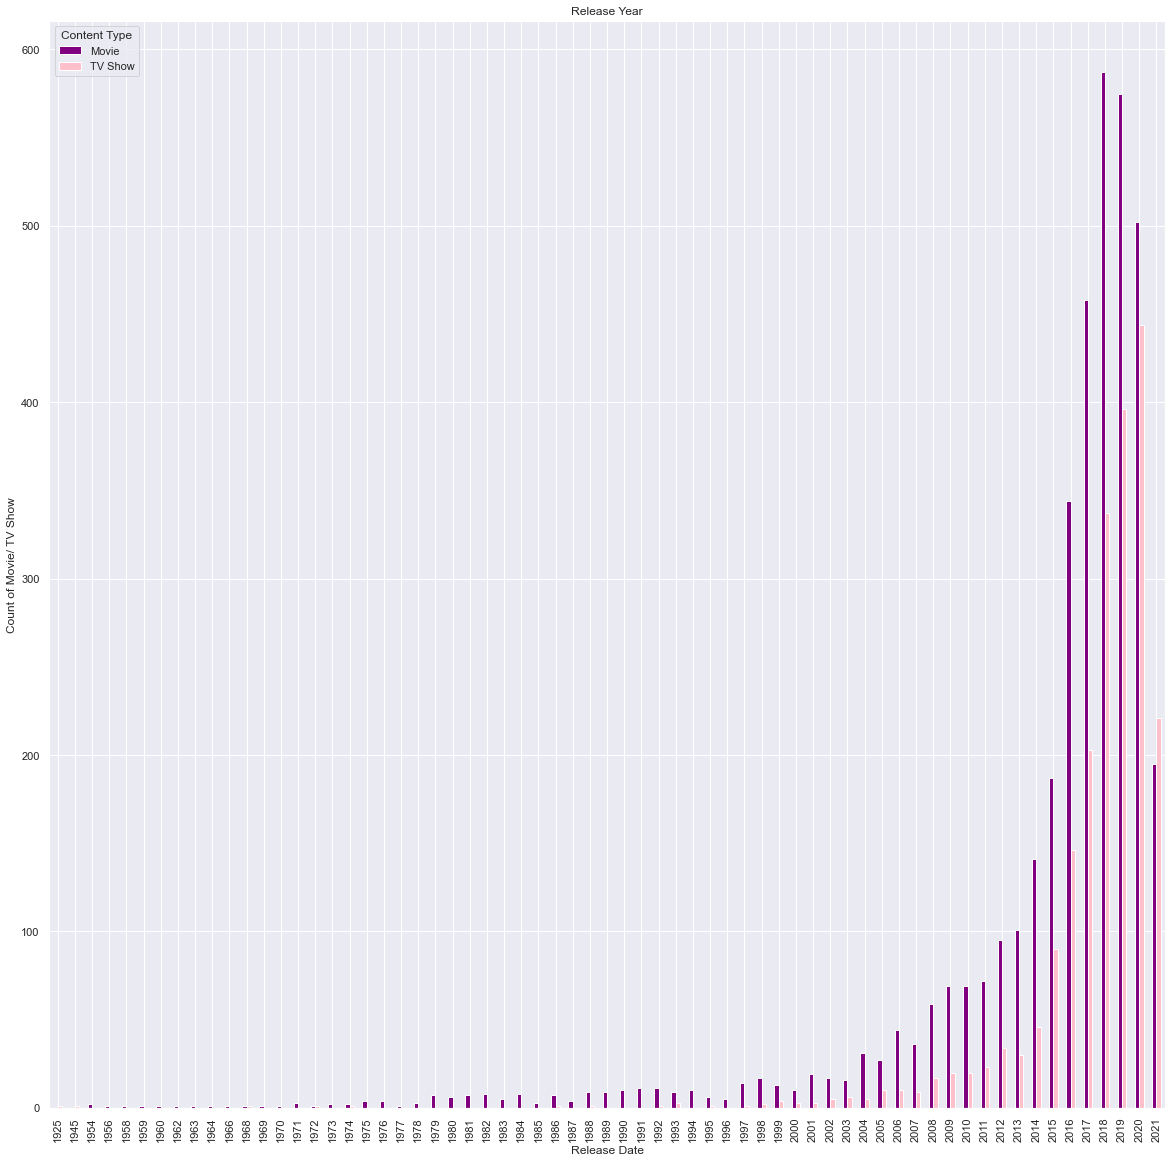

In [118]:
#Год выпуска
# Попробуем выявить зависимость между годом выпуска и количеством видеоконтента на платформе
netflix_data['Release Date'] = netflix_data['Release Date'].round().astype(int)
content_added = netflix_data.groupby(["Content Type","Release Date"])["Release Date"].count().unstack('Content Type')
content_added = content_added.sort_values(ascending=True, by='Release Date')
content_added.plot(kind='bar',color=["#800080","#FFC0CB"],figsize=(20, 20), title = "Release Year").set_ylabel("Count of Movie/ TV Show")

Вывод: Судя по графику, с течением времени количество как фильмов так и сериалов на платформе возрасло. Наиболее заментый подъем наблюдаетсяв период с 2014 года. 

Text(0, 0.5, 'Count of Movie/ TV Show')

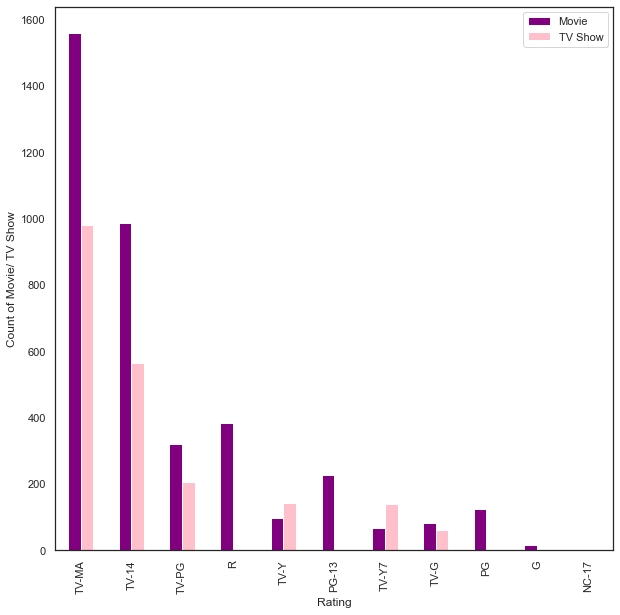

In [134]:
#Проведем анализ рейтингов фильмов в зависимости от вида контента 
rating_grouped = netflix_data.groupby(["Content Type","Rating"])["Rating"].count().unstack('Content Type')
rating_grouped.columns =['Movie', 'TV Show']
rating_grouped['TV Show'] = rating_grouped['TV Show'].fillna(0)
rating_grouped['Total'] = rating_grouped["Movie"] + rating_grouped["TV Show"]
rating_grouped = rating_grouped.sort_values(ascending=False, by='Total')
rating_grouped.plot(kind='bar',y=["Movie","TV Show"],color=["#800080","#FFC0CB"],figsize=(10, 10)).set_ylabel("Count of Movie/ TV Show")

На графике видно, что количество ТВ-шоу категории TV-Y и TV-Y7 больше, чем фильмов. Это означает, что детский контент более широко предствавлен именно в формате телевизионных шоу. Формат ТВ-шоу отсутствует в категориях рейтингов PG, PG-13 и G, что означет, что Netflix не предоставляет контент ТВ-шоу для просмотра детей под присмотром родителей, а так же в рейтинге R для аудитории строго старше 16 лет.

<AxesSubplot:ylabel='Genres'>

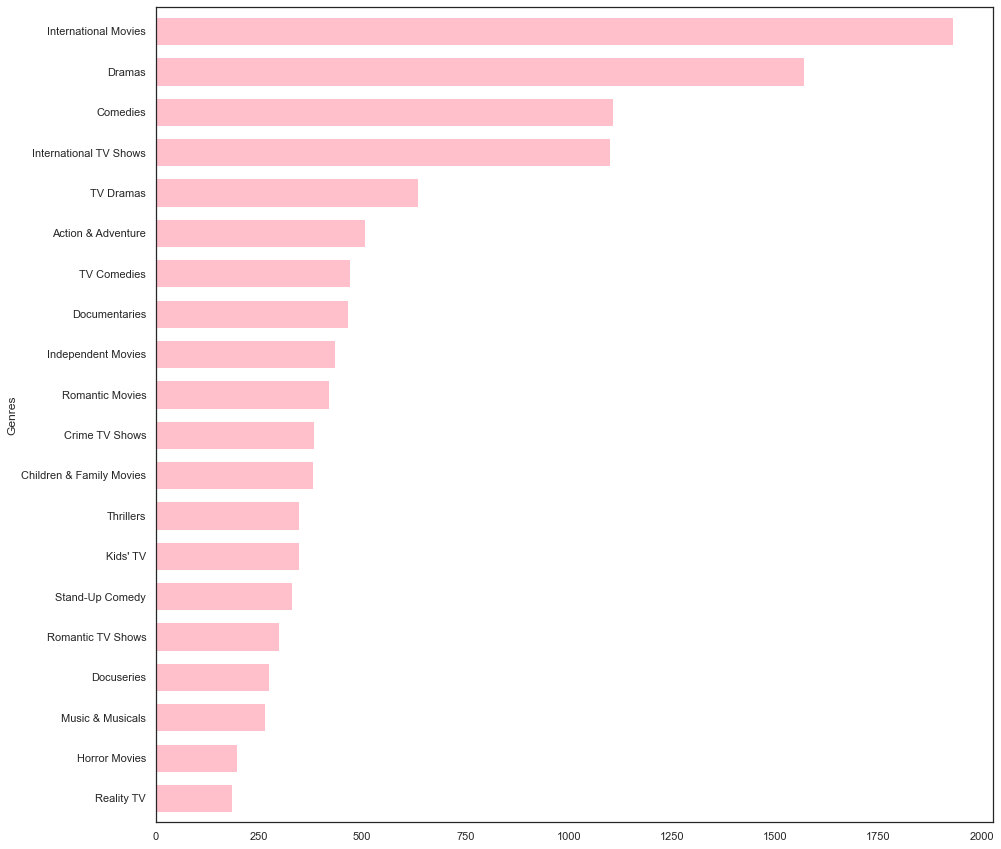

In [136]:
# Выявим наиболее популярные жанры 
genres = ", ".join(netflix_data['Genres']).split(", ")
genres

from collections import Counter
cnt = Counter()
for genre in genres:
    cnt[genre] += 1

topGenres = cnt.most_common(20)
df_topGenres = pd.DataFrame (topGenres, columns = ['Genres','Genres Count'])
df_topGenres.sort_values(ascending=True, by='Genres Count', inplace=True)
df_topGenres.plot.barh(x='Genres',color=["#FFC0CB","#e50914"],width=0.7,legend=False, figsize=(15, 15))

Можно увидеть, что наибольшее количество конттента на платформе представленно международными (что бы это не значило) фильмами и ТВ-шоу (сериалы), а также драмами и комедиями. Самый редко встречающийся жанр - реалити шоу.

In [137]:
# Посмотрим на распределение контента по странам 


netflix_data['Production Country'].head(20)

0             United States
1               South Korea
2                     Italy
3             United States
4                    Canada
5                 Indonesia
6                 Indonesia
7             United States
8             United States
9                   Romania
10                  Romania
11    South Africa, Nigeria
12                   France
13              South Korea
14            United States
15          Portugal, Spain
16            United States
17                Indonesia
18                    India
19                    Egypt
Name: Production Country, dtype: object

In [140]:
#Поскольку в одном столбце указано несколько стран, мы создаем еще один столбец, в котором будет храниться только первая из указанных стран

netflix_data['First Production Country'] = netflix_data['Production Country'].str.split(',', expand=True)[0]
netflix_data.head() # проверяем, вышло ли..

,Show Id,Title,Description,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,First Production Country
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,Reality TV,No Data,United States,2020,TV-MA,1 Season,6.6/10,TV Show,United States
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...","Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020,TV-MA,99 min,6.2/10,Movie,South Korea
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019,TV-14,95 min,6.4/10,Movie,Italy
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020,TV-MA,1 Season,6.6/10,TV Show,United States
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,"Documentaries, International Movies",No Data,Canada,2020,TV-14,90 min,5.1/10,Movie,Canada


Text(0.5, 0, 'Production Country')

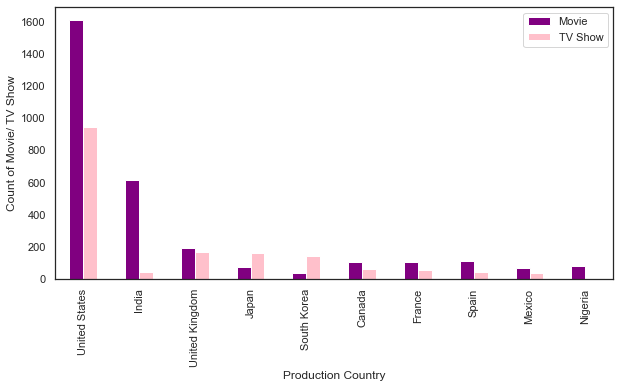

In [143]:
country_grouped = netflix_data.groupby(["Content Type","First Production Country"])["First Production Country"].count().unstack('Content Type')
country_grouped.columns =['Movie', 'TV Show']
country_grouped['Total'] = country_grouped["Movie"] + country_grouped["TV Show"]
country_grouped = country_grouped.sort_values(ascending=False, by='Total')
country_grouped[:10].plot(kind='bar',y=["Movie","TV Show"],color=["#800080","#FFC0CB"],figsize=(10, 5)).set_ylabel("Count of Movie/ TV Show")
plt.xlabel("Production Country")

Согласно графику распределения контента по странам, можно сделать вывод о том, что наибольшее количество фильмов и сериалов производят в США, однако Индия тоже держит давольно высокую планку и активно пытается захватит) киноиндустрию, все больше и больше радуя нас своими фильмами (сериалы и ТВ-шоу их явно не сильно интересуют, судя по графику, они отчаялись создать что-то лучше Зиты и Гиты).

In [144]:
# Проанализируем показатель оценки IMDB
# Выявим контент с самым высоким рейтингом - это контент с оценкой IMDB более 9,0

data_topRated = netflix_data.loc[netflix_data["Imdb Score"] >= '9.0/10', ["Title","Imdb Score","Content Type"]]
data_topRated = data_topRated.sort_values(ascending=False, by='Imdb Score').reset_index(drop=True)
data_topRated

,Title,Imdb Score,Content Type
0,Breaking Bad,9.4/10,TV Show
1,Avatar: The Last Airbender,9.3/10,TV Show
2,Our Planet,9.2/10,TV Show
3,Reply 1988,9.2/10,TV Show
4,The Last Dance,9.2/10,TV Show
5,David Attenborough: A Life on Our Planet,9.1/10,Movie
6,Leyla and Mecnun,9.1/10,TV Show
7,The Untamed,9.1/10,TV Show
8,Attack on Titan,9.0/10,TV Show
9,Bo Burnham: Inside,9.0/10,Movie


Как мы видим: "Во все тяжкие" - телешоу №1 в рейтинге, а фильм №1 в рейтинге - "Дэвид Аттенборо: жизнь на нашей планете" 


In [145]:
# Выявим контент с самым низким рейтингом - это контент с оценкой IMDB менее 2,0

data_lowestRated = netflix_data.loc[netflix_data["Imdb Score"] < '2.0/10', ["Title","Imdb Score","Content Type"]]
data_lowestRated = data_lowestRated.sort_values(ascending=True, by='Imdb Score').reset_index(drop=True)
data_lowestRated

,Title,Imdb Score,Content Type
0,Aerials,1.3/10,Movie
1,Time to Dance,1.7/10,Movie
2,Himmatwala,1.8/10,Movie
3,5Gang,1.9/10,Movie
4,Cross: Rise of the Villains,1.9/10,Movie


"Антены" - фильм с самым низким рейтингом (возможно, это из-за названия)

<AxesSubplot:xlabel='Actor'>

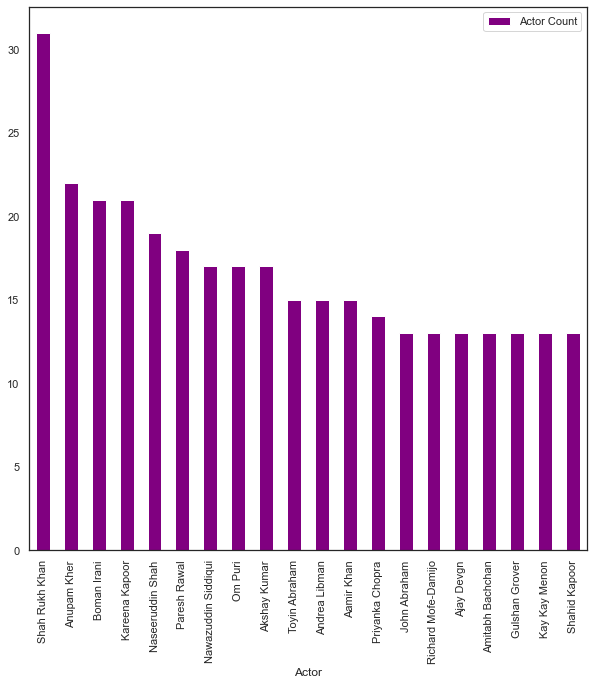

In [147]:
#Проанализируем каст 
# (А) Самые популярные актеры фильмов 
cast_grouped =  netflix_data.groupby(["Content Type","Cast"])["Cast"].count().unstack('Content Type')
cast_grouped.columns =['Movie', 'TV Show']
cast_grouped_movie = cast_grouped[cast_grouped["Movie"].notnull()].iloc[:,:1]
cast_grouped_movie.reset_index(level='Cast', inplace=True)

movieCast = ", ".join(cast_grouped_movie['Cast']).split(", ")
movieCast

cnt_movieCast = Counter()

for cast in movieCast:
    cnt_movieCast[cast] += 1

movieCast = cnt_movieCast.most_common(20)
data_movieCast = pd.DataFrame (movieCast, columns = ['Actor','Actor Count'])
data_movieCast.sort_values(ascending=False, by='Actor Count', inplace=True)
data_movieCast.plot(kind='bar',x='Actor',color=["#800080","#FFC0CB"],figsize=(10, 10))

Наибольшей популярностью отлечился Shan Rukh Khan, известный как «король Болливуда» (очень похож на индийского Джеки Чана) Anupam Kher, Boman Irani, Kareena Kapoor - аналогично являются индийскими актерами, что говорит о мощнейших возможностях Болливуда и о скорости создания там восхитительного контента! 

<AxesSubplot:xlabel='Actor'>

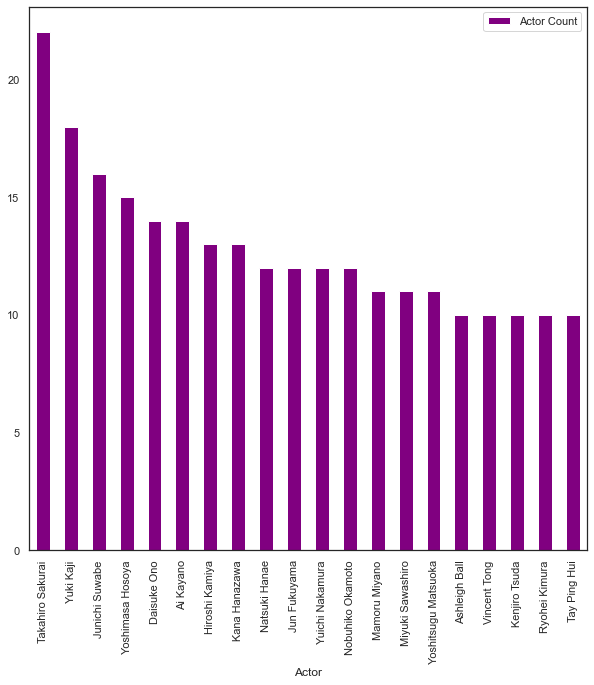

In [148]:
# (B) Самые популярные актеры ТВ-шоу (сериалов)

cast_grouped_tv = cast_grouped[cast_grouped["TV Show"].notnull()].iloc[:,:1]
cast_grouped_tv.reset_index(level='Cast', inplace=True)

tvCast = ", ".join(cast_grouped_tv['Cast']).split(", ")
tvCast

cnt_tvCast = Counter()

for cast in tvCast:
    cnt_tvCast[cast] += 1

tvCast = cnt_tvCast.most_common(20)
data_tvCast = pd.DataFrame (tvCast, columns = ['Actor','Actor Count'])
data_tvCast.sort_values(ascending=False, by='Actor Count', inplace=True)
data_tvCast.plot(kind='bar',x='Actor',color=["#800080","#FFC0CB"],figsize=(10, 10))

In [ ]:
Из полученного графика видно, что в топе находятся Takahiro Sakurai и Yuki Kaji, которые являются японскими телеведущими и оба выглядят как солисты группы На-На.